# Principal Component Analysis (PCA)
PCA example solved with Iris dataset. <br>
PCA is commonly used for unsupervised learning and dimensionality reduction. <br>
It provides easy way to analyse data. <br>
The array of weights that are used are called eigen vector

In [1]:
import pandas as pd

# Iris dataset location
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal length','sepal width','petal length','petal width','target']

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=column_names)
print(df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Standardize the data
Scaling of features is important before aplying PCA. <br>
Standard Scalar is used to standardize the data (mean=0, variance=1). <br>
This is the main requirement for optimal performance in ML.

In [2]:
# Library for standard scalar
from sklearn.preprocessing import StandardScaler

features = ['sepal length','sepal width','petal length','petal width']
# Separating features
x = df.loc[:, features].values
print('Before Standardizing\n', x)

class_label = ['target']
# Separating target
y = df.loc[:, class_label].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
print('After Standardizing\n', x)

Before Standardizing
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

## PCA projection from 4D to 2D
Here dimensionality reduction is performed.<br>

In [7]:
# PCA library
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data = principal_components,
                           columns = ['principal component 1', 'principal component 2'])
print(principal_df.head())

   principal component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3              -2.304197              -0.575368
4              -2.388777               0.674767


In [8]:
# Final dataset with principal components
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
print(final_df.head())

   principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


## Plot graph (visualize data)

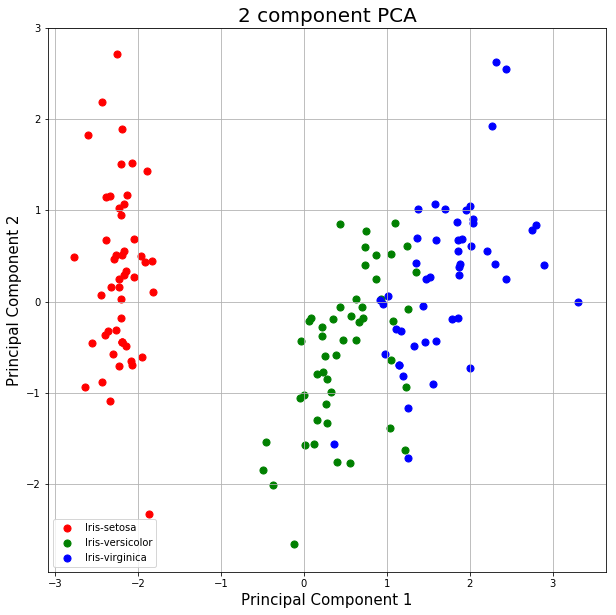

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = (final_df['target'] == target)
    ax.scatter(final_df.loc[indices_to_keep, 'principal component 1'],
               final_df.loc[indices_to_keep, 'principal component 2'],
               c = color,
               s = 50)

ax.legend(targets)
ax.grid()
plt.plot()
plt.show()

By using the attribute explained_variance_ratio_, you can see the variance of first principal component and second principal component. Together, the two components contain 95.80% of the information.

In [6]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523]
